In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats




# Load the data
file_path = 'Assignment_DataScientist_20250502.csv'
df = pd.read_csv(file_path)

In [4]:
# Aggregate duplicates by Experiment and Fruit nr (mean for spectra and targets)
group_cols = ['Experiment', 'Fruit nr']
spectral_cols = df.columns[:112]
meta_cols = ['sensorT', 'Size', 'Weight', 'Brix', 'TA', 'Firmness (kg)']
df_agg = df.groupby(group_cols).agg({**{col: 'mean' for col in spectral_cols},
                                     **{col: 'first' for col in meta_cols}}).reset_index()
print("Aggregated shape:", df_agg.shape)



Aggregated shape: (900, 120)


In [ ]:

# # Null Handling and Outlier Removal
# Drop rows with nulls and remove outliers from each target using a Z-score threshold.


# Drop nulls
df_clean = df_agg.dropna().copy()

# Remove outliers based on Z-score for targets
for target in ['Brix', 'TA', 'Firmness (kg)']:
    z_scores = np.abs(stats.zscore(df_clean[target]))
    df_clean = df_clean[z_scores < 3]

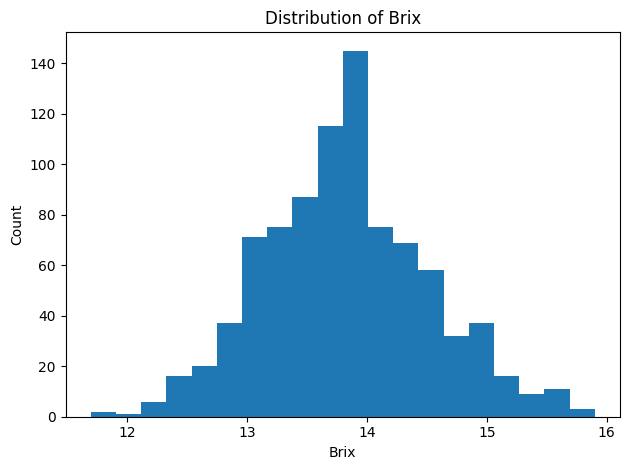

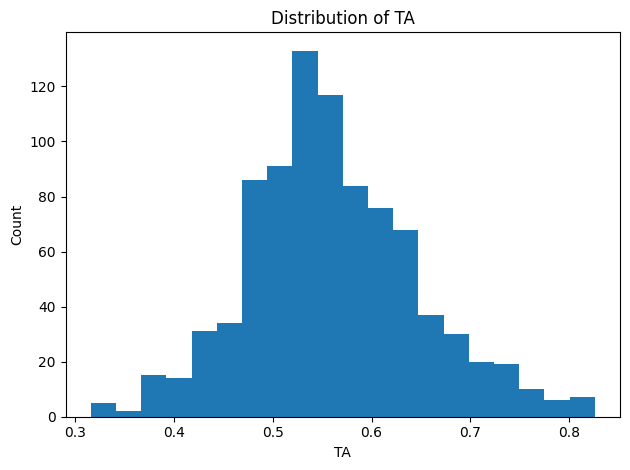

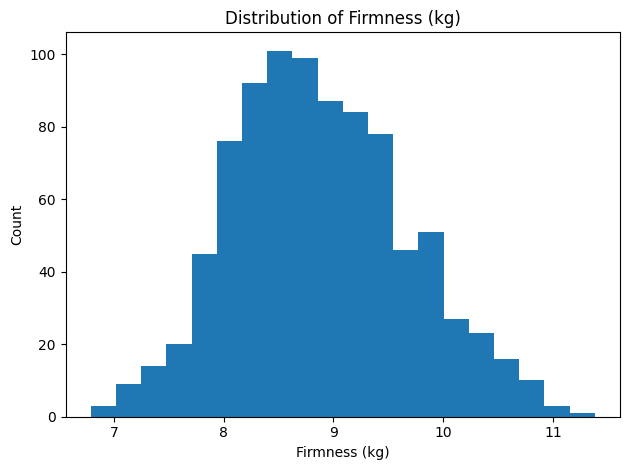

In [ ]:

# # Target Distribution
# Plot histograms for each target to inspect their distributions.


targets = ['Brix', 'TA', 'Firmness (kg)']
for target in targets:
    plt.figure()
    plt.hist(df_clean[target], bins=20)
    plt.title(f'Distribution of {target}')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [ ]:

all_cols = list(spectral_cols) + targets


corr_df = df_clean[all_cols].corr().loc[spectral_cols, targets]



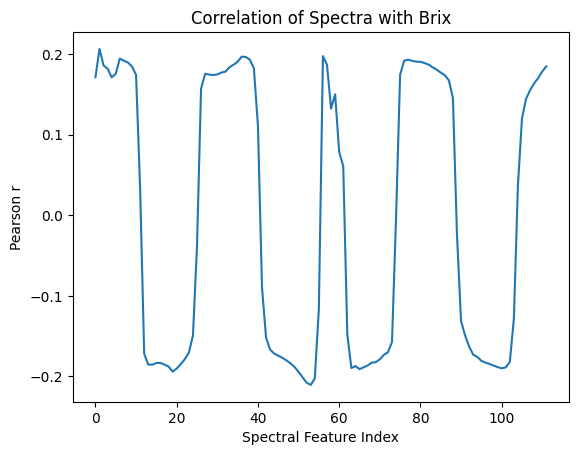

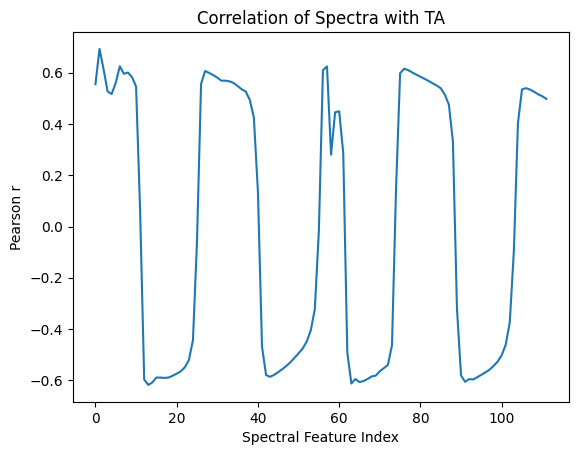

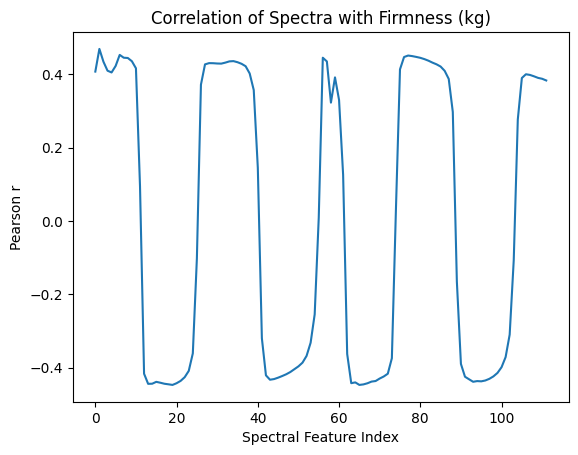

In [13]:
for tgt in targets:
    plt.figure()
    plt.plot(corr_df[tgt].values)
    plt.title(f'Correlation of Spectra with {tgt}')
    plt.xlabel('Spectral Feature Index')
    plt.ylabel('Pearson r')
    plt.show()


In [14]:
def top_features(corr_series, top_n=10):
    s = corr_series.sort_values()
    return pd.concat([s.tail(top_n).iloc[::-1], s.head(top_n)])

for tgt in targets:
    print(f"Top features for {tgt}:")
    print(top_features(corr_df[tgt], top_n=10))


Top features for Brix:
0.5_GHz_real      0.206371
0.25_GHz_imag     0.197377
9.25_GHz_real     0.196754
9.5_GHz_real      0.196337
1.75_GHz_real     0.194378
9.75_GHz_real     0.193074
5.5_GHz_imag      0.193055
5.25_GHz_imag     0.191805
2.0_GHz_real      0.191747
5.75_GHz_imag     0.191513
13.5_GHz_real    -0.210611
13.25_GHz_real   -0.207876
13.75_GHz_real   -0.202600
13.0_GHz_real    -0.201227
12.75_GHz_real   -0.194431
5.0_GHz_real     -0.194080
2.5_GHz_imag     -0.190982
5.25_GHz_real    -0.190357
11.25_GHz_imag   -0.189984
2.0_GHz_imag     -0.189674
Name: Brix, dtype: float64
Top features for TA:
0.5_GHz_real     0.692605
1.75_GHz_real    0.625059
0.5_GHz_imag     0.624238
5.25_GHz_imag    0.615372
0.75_GHz_real    0.613491
0.25_GHz_imag    0.609850
5.5_GHz_imag     0.609740
7.0_GHz_real     0.606543
5.75_GHz_imag    0.600518
2.25_GHz_real    0.600424
3.5_GHz_real    -0.617864
2.0_GHz_imag    -0.612316
3.75_GHz_real   -0.608259
2.5_GHz_imag    -0.606883
9.0_GHz_imag    -0.605634

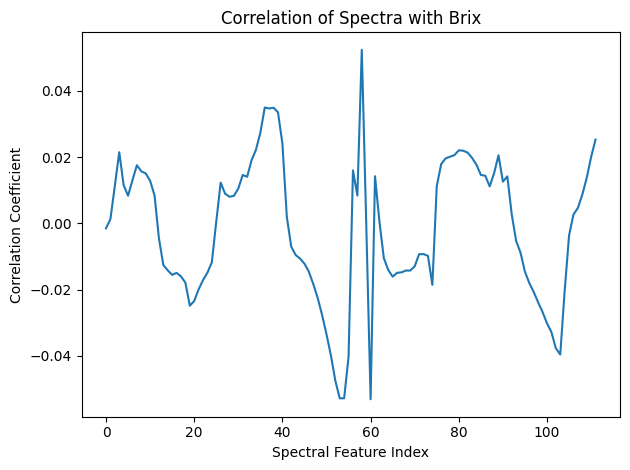

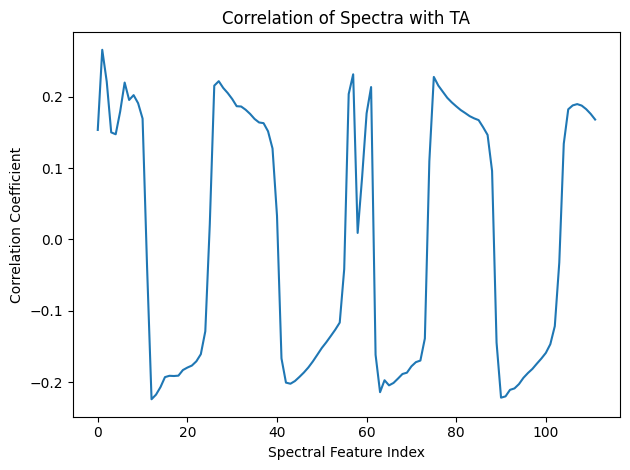

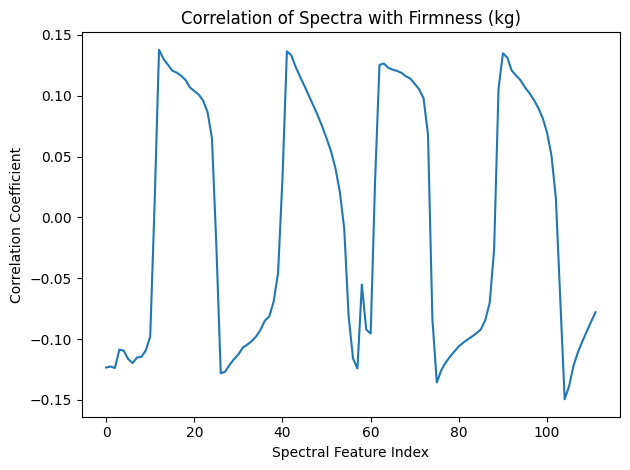

In [ ]:

# # Correlation Analysis
# Compute and plot the correlation between spectral features and each target.


# Compute correlation matrix
corr_matrix = df_clean[spectral_cols.tolist() + targets].corr()


for target in targets:
    plt.figure()
    corr_values = corr_matrix[target].loc[spectral_cols]
    plt.plot(range(len(spectral_cols)), corr_values.values)
    plt.title(f'Correlation of Spectra with {target}')
    plt.xlabel('Spectral Feature Index')
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()


In [ ]:

# # 1. Load & Aggregate Duplicates


import pandas as pd
import numpy as np
from scipy import stats

# load
df = pd.read_csv('Assignment_DataScientist_20250502.csv')

# define which columns are spectra vs. targets
spectral_cols = df.columns[:112]               
targets = ['Brix', 'TA', 'Firmness (kg)']
group_cols = ['Experiment', 'Fruit nr']

# aggregate duplicates by mean
df_agg = df.groupby(group_cols).agg(
    {**{col: 'mean' for col in spectral_cols},
     **{col: 'mean' for col in targets}}
).reset_index()



# # 2. Drop Nulls & Remove Outliers



df_clean = df_agg.dropna(subset=list(spectral_cols) + targets)


for tgt in targets:
    z = np.abs(stats.zscore(df_clean[tgt]))
    df_clean = df_clean[z < 3]



# # 3. Compute Correlations


# compute Pearson corr between every spectral column and each target
corr_df = df_clean[list(spectral_cols) + targets].corr().loc[spectral_cols, targets]



# # 4. Extract Top Features per Target


def top_features(corr_series, top_n=10):
    """Return top_n positive and negative correlations from a Series."""
    sorted_corr = corr_series.sort_values()
    neg = sorted_corr.head(top_n)
    pos = sorted_corr.tail(top_n).iloc[::-1]
    return pd.concat([pos, neg])

top_n = 10  

results = {}
for tgt in targets:
    results[tgt] = top_features(corr_df[tgt], top_n=top_n)


for tgt, series in results.items():
    print(f"\n=== Top {top_n} positive & negative correlated bands with {tgt} ===")
    print(series.to_frame(name='Pearson_r'))




=== Top 10 positive & negative correlated bands with Brix ===
                Pearson_r
0.5_GHz_real     0.206371
0.25_GHz_imag    0.197377
9.25_GHz_real    0.196754
9.5_GHz_real     0.196337
1.75_GHz_real    0.194378
9.75_GHz_real    0.193074
5.5_GHz_imag     0.193055
5.25_GHz_imag    0.191805
2.0_GHz_real     0.191747
5.75_GHz_imag    0.191513
13.5_GHz_real   -0.210611
13.25_GHz_real  -0.207876
13.75_GHz_real  -0.202600
13.0_GHz_real   -0.201227
12.75_GHz_real  -0.194431
5.0_GHz_real    -0.194080
2.5_GHz_imag    -0.190982
5.25_GHz_real   -0.190357
11.25_GHz_imag  -0.189984
2.0_GHz_imag    -0.189674

=== Top 10 positive & negative correlated bands with TA ===
               Pearson_r
0.5_GHz_real    0.692605
1.75_GHz_real   0.625059
0.5_GHz_imag    0.624238
5.25_GHz_imag   0.615372
0.75_GHz_real   0.613491
0.25_GHz_imag   0.609850
5.5_GHz_imag    0.609740
7.0_GHz_real    0.606543
5.75_GHz_imag   0.600518
2.25_GHz_real   0.600424
3.5_GHz_real   -0.617864
2.0_GHz_imag   -0.612316
3.75_

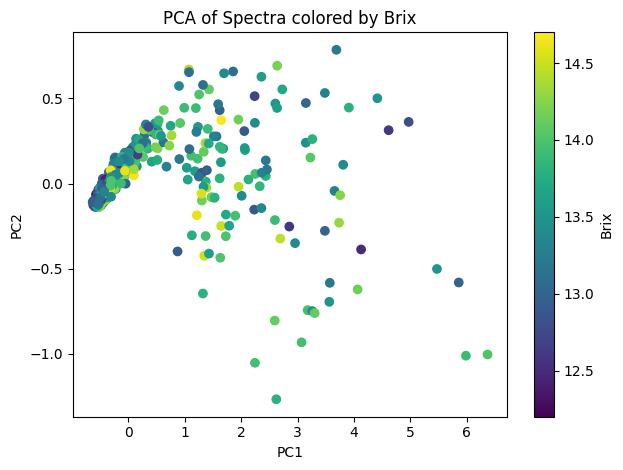

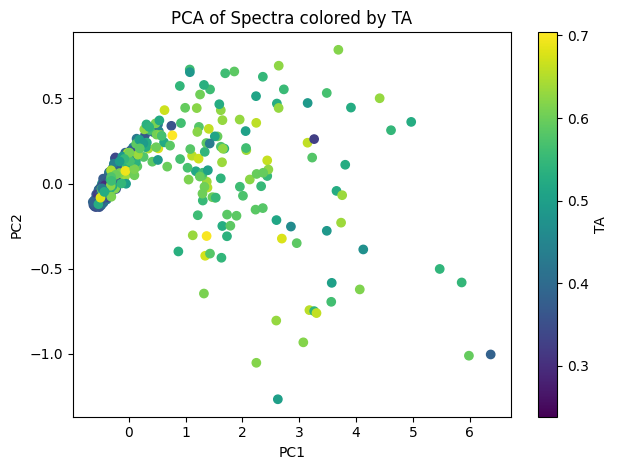

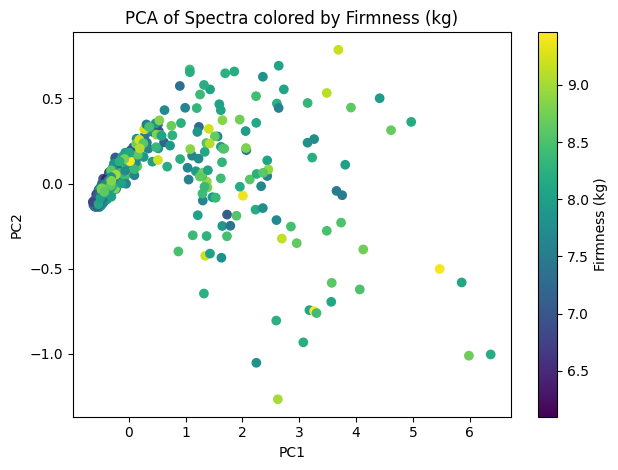

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Perform PCA on the cleaned spectral data and visualize the first two principal components,
# coloring points by each target attribute.


# Load the cleaned data from previous steps
file_path = 'Assignment_DataScientist_20250502.csv'
df = pd.read_csv(file_path)


group_cols = ['Experiment', 'Fruit nr']
spectral_cols = df.columns[:112]
targets = ['Brix', 'TA', 'Firmness (kg)']

df_agg = df.groupby(group_cols).agg(
    {**{col: 'mean' for col in spectral_cols},
     **{col: 'mean' for col in targets}}
).reset_index()


from scipy import stats
df_clean = df_agg.dropna(subset=list(spectral_cols) + targets)
for tgt in targets:
    df_clean = df_clean[abs(stats.zscore(df_clean[tgt])) < 3]


X = df_clean[spectral_cols].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA results back to DataFrame
df_clean['PC1'] = X_pca[:, 0]
df_clean['PC2'] = X_pca[:, 1]


# ## Scatter Plots of PC1 vs. PC2 colored by each target


for tgt in targets:
    plt.figure()
    plt.scatter(df_clean['PC1'], df_clean['PC2'], c=df_clean[tgt])
    plt.title(f'PCA of Spectra colored by {tgt}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(label=tgt)
    plt.tight_layout()
    plt.show()
